# Main Macroeconomic Variables for the U.S economy

In this notebook I share the Stata code to replicate some of the graphs I used to teach Principles of Macroeconomics at the University of Houston in the Summer, 2022.

I use the <i>fred</i> Stata command to import key macroeconomic variables.

## Create Graphs in Stata

### Set Stata Magic in Python

In [1]:
%%capture
import os
os.chdir('/Program Files/Stata17/utilities')
from pystata import config
config.init('se')

### Import Data from Web
You will need to set your own fredkey. To request your API key click [here](https://fred.stlouisfed.org/docs/api/api_key.html).

In [2]:
%%stata
*set fredkey [your key], permanently

In [3]:
%%stata
import fred EXPGS IMPGS GDP GPDI GCE PCEC, daterange(1950-01-01 2022-08-01) aggregate(quarterly) clear


Summary
-------------------------------------------------------------------------------
Series ID                    Nobs    Date range                Frequency
-------------------------------------------------------------------------------
EXPGS                        290     1950-01-01 to 2022-04-01  Quarterly
IMPGS                        290     1950-01-01 to 2022-04-01  Quarterly
GDP                          290     1950-01-01 to 2022-04-01  Quarterly
GPDI                         290     1950-01-01 to 2022-04-01  Quarterly
GCE                          290     1950-01-01 to 2022-04-01  Quarterly
PCEC                         290     1950-01-01 to 2022-04-01  Quarterly
-------------------------------------------------------------------------------
# of series imported: 6
   highest frequency: Quarterly
    lowest frequency: Quarterly


### Create initial variables

In [4]:
%%stata
gen Saving = GDP-PCEC-GCE
ren  GPDI Investment
gen NCO = Saving - Investment
gen NX = EXPGS-IMPGS

gl varlist EXPGS IMPGS Saving Investment NCO NX

* Generate variables as percentage of GDP
foreach var in $varlist {
	gen `var'_per = `var'/GDP*100
}

label var IMPGS_per "Imports"
label var EXPGS_per "Exports"
label var Saving_per "Saving" 
label var Investment_per "Investment"
label var NCO_per "NCO"
label var NX_per "Net Exports"


. gen Saving = GDP-PCEC-GCE

. ren  GPDI Investment

. gen NCO = Saving - Investment

. gen NX = EXPGS-IMPGS

. 
. gl varlist EXPGS IMPGS Saving Investment NCO NX

. 
. * Generate variables as percentage of GDP
. foreach var in $varlist {
  2.         gen `var'_per = `var'/GDP*100
  3. }

. 
. label var IMPGS_per "Imports"

. label var EXPGS_per "Exports"

. label var Saving_per "Saving" 

. label var Investment_per "Investment"

. label var NCO_per "NCO"

. label var NX_per "Net Exports"

. 


### Set time variables

In [5]:
%%stata
format %tq daten
tsset daten, quarterly 


. format %tq daten

. tsset daten, quarterly 

Time variable: daten, 1047q1 to 7644q1, but with gaps
        Delta: 1 quarter

. 


## Graphs for Open Economy 


. twoway (tsline IMPGS_per, lcolor(red) lwidth(medthick)) (tsline EXPGS_per, lc
> olor(blue) lwidth(medthick)) ///
> (tsline NX_per, lcolor(green) lwidth(medthick)), ytitle(Percent of GDP) ///
> tlabel(#10, format(%tdCY)) ylabel(-10(5)20, angle(0) nogrid ) ttitle("") ///
> yline(0, lwidth(vthin) lcolor(gray) lpattern(dash)) ///
>  graphregion(fcolor(white)) plotregion(fcolor(white)) ///
> legend(region(lcolor(none) fcolor(none)) ring(0) pos(10) col(1)) ///
>     title("The Internationalization of the U.S. Economy")

. 


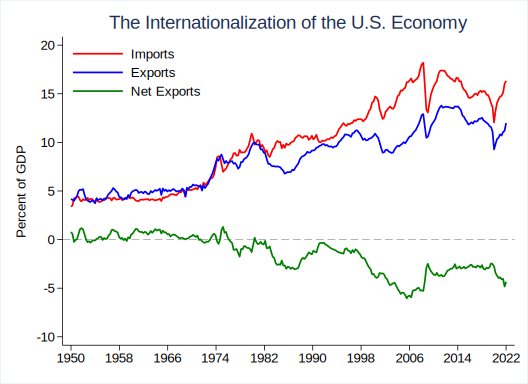

In [6]:
%%stata
twoway (tsline IMPGS_per, lcolor(red) lwidth(medthick)) (tsline EXPGS_per, lcolor(blue) lwidth(medthick)) ///
(tsline NX_per, lcolor(green) lwidth(medthick)), ytitle(Percent of GDP) ///
tlabel(#10, format(%tdCY)) ylabel(-10(5)20, angle(0) nogrid ) ttitle("") ///
yline(0, lwidth(vthin) lcolor(gray) lpattern(dash)) ///
 graphregion(fcolor(white)) plotregion(fcolor(white)) ///
legend(region(lcolor(none) fcolor(none)) ring(0) pos(10) col(1)) ///
    title("The Internationalization of the U.S. Economy")


. twoway (tsline Investment_per, lcolor(red) lwidth(medthick)) (tsline Saving_p
> er, lcolor(blue) lwidth(medthick)) ///
> (tsline NCO_per, lcolor(green) lwidth(medthick)), ytitle(Percent of GDP) ylin
> e(0, lwidth(vthin) lcolor(gray) lpattern(dash)) ///
> tlabel(#10, format(%tdCY)) ylabel(-10(5)25, angle(0) nogrid ) ttitle("") ///
>  graphregion(fcolor(white)) plotregion(fcolor(white)) ///
> legend(region(lcolor(none) fcolor(none)) ring(0) pos(7) rowgap(.5) col(1)) //
> /
>     title("National Saving, Domestic Investment, and Net Capital Outflow", si
> ze(medium))

. 


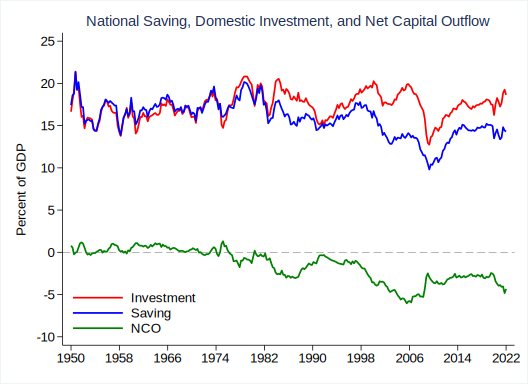

In [7]:
%%stata
twoway (tsline Investment_per, lcolor(red) lwidth(medthick)) (tsline Saving_per, lcolor(blue) lwidth(medthick)) ///
(tsline NCO_per, lcolor(green) lwidth(medthick)), ytitle(Percent of GDP) yline(0, lwidth(vthin) lcolor(gray) lpattern(dash)) ///
tlabel(#10, format(%tdCY)) ylabel(-10(5)25, angle(0) nogrid ) ttitle("") ///
 graphregion(fcolor(white)) plotregion(fcolor(white)) ///
legend(region(lcolor(none) fcolor(none)) ring(0) pos(7) rowgap(.5) col(1)) ///
    title("National Saving, Domestic Investment, and Net Capital Outflow", size(medium))


## Manufacturing share of nonfarm employment

In [8]:
%%stata
import fred MANEMP PAYNSA PAYEMS USRECM, daterange(1939-01-01 2022-05-31) clear


Summary
-------------------------------------------------------------------------------
Series ID                    Nobs    Date range                Frequency
-------------------------------------------------------------------------------
MANEMP                       1001    1939-01-01 to 2022-05-01  Monthly
PAYNSA                       1001    1939-01-01 to 2022-05-01  Monthly
PAYEMS                       1001    1939-01-01 to 2022-05-01  Monthly
USRECM                       1001    1939-01-01 to 2022-05-01  Monthly
-------------------------------------------------------------------------------
# of series imported: 4
   highest frequency: Monthly
    lowest frequency: Monthly


### Set time variables

In [9]:
%%stata
generate datem = mofd(daten)
tsset datem, monthly


. generate datem = mofd(daten)

. tsset datem, monthly

Time variable: datem, 1939m1 to 2022m5
        Delta: 1 month

. 


### Create variables to plot

In [10]:
%%stata
gen manf_share = MANEMP/PAYNSA

label variable USRECM "Recession"
label variable manf_share "Manufacturing share"

summ manf_share

local max = r(max)
local min = r(min)

dis `max'
dis `min'

replace USRECM = `max'*USRECM
replace USRECM = `min' if USRECM==0


. gen manf_share = MANEMP/PAYNSA

. 
. label variable USRECM "Recession"

. label variable manf_share "Manufacturing share"

. 
. summ manf_share

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  manf_share |      1,001    .2069254     .088637     .08331   .3901507

. 
. local max = r(max)

. local min = r(min)

. 
. dis `max'
.3901507

. dis `min'
.08331003

. 
. replace USRECM = `max'*USRECM
variable USRECM was byte now float
(145 real changes made)

. replace USRECM = `min' if USRECM==0
(856 real changes made)

. 


### Graph


. set scheme s1color

. twoway (area USRECM datem, color(gs14)) ///
>     (tsline manf_share, lcolor(blue)), ///
>     xtitle("") ytitle("Manufacturing share of nonfarm employment") ///
>     ylabel(`min'(0.05)`max') tlabel(, format(%tmCCYY)) ///
>     graphregion(fcolor(white)) plotregion(fcolor(white)) ///
>     title("Manufacturing share of US nonfarm employment (1990–2022)", size(me
> dium))

. 


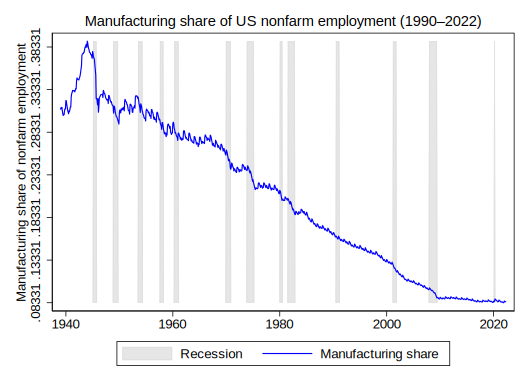

In [11]:
%%stata
set scheme s1color
twoway (area USRECM datem, color(gs14)) ///
    (tsline manf_share, lcolor(blue)), ///
    xtitle("") ytitle("Manufacturing share of nonfarm employment") ///
    ylabel(`min'(0.05)`max') tlabel(, format(%tmCCYY)) ///
    graphregion(fcolor(white)) plotregion(fcolor(white)) ///
    title("Manufacturing share of US nonfarm employment (1990–2022)", size(medium))